In [1]:
import numpy as np
import graphtools as gt
import pygsp as gsp
import matplotlib.pyplot as plt
import sys
sys.path.append('/media/jaystanley/ExtraDrive1/External/experiments/MELD/python/')
import meld.meldconvex as mc
from sklearn.cluster import KMeans
import scipy.sparse as ss
import sklearn.preprocessing as sklp

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## generate gaussian mixtures 

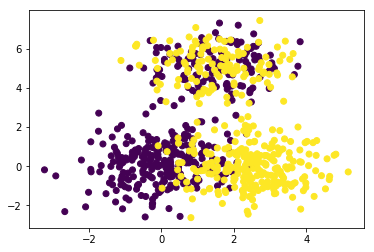

In [2]:
N = 750
mu1 = [0,0,0]
sigma1 = np.eye(3)
mu2 = [2.5,0,0]
sigma2 = np.eye(3)

mu3 = [1.5,5,0]
sigma3 = np.eye(3)

d1 = np.random.multivariate_normal(mu1, sigma1, 250)
d2 = np.random.multivariate_normal(mu2,sigma2, 250)
d3 = np.random.multivariate_normal(mu3,sigma3, 250)
d1 = d1[np.argsort(d1[:,0])]
d2 = d2[np.argsort(d2[:,0])]
idx = np.hstack((-1*np.ones(250), 1*np.ones(250), -1*np.ones(125), np.ones(125)))
d_all = np.vstack((d1,d2,d3))
plt.scatter(d_all[:,0], d_all[:,1], c=idx)
plt.show()

## build graph, get fourier basis

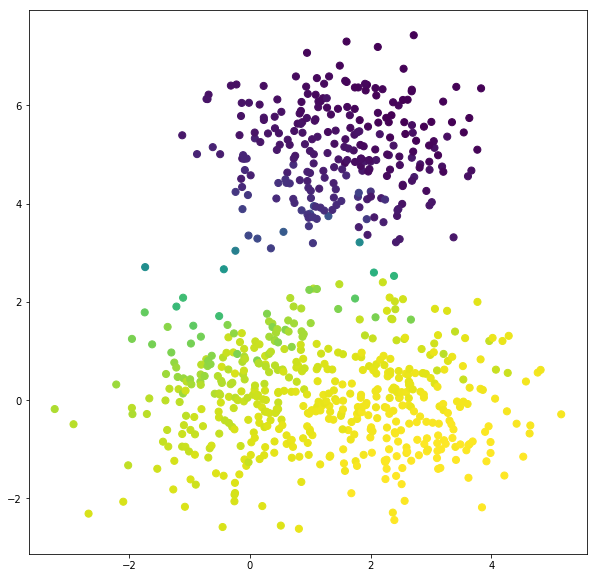

In [3]:
g = gt.Graph(d_all,decay=20, knn=5, use_pygsp = True)
g.compute_fourier_basis()
plt.figure(figsize = (10,10))

plt.scatter(d_all[:,0], d_all[:,1], c=g.U[:,1],s=50)
plt.show()

## Cluster embedding normally

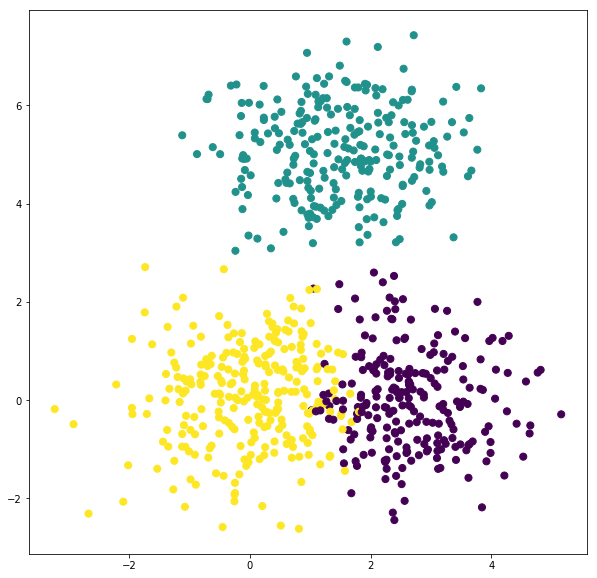

In [4]:

plt.figure(figsize = (10,10))
clabels = KMeans(n_clusters=3).fit_predict(g.U[:,0:3])
plt.scatter(d_all[:,0], d_all[:,1], c=clabels,s =50)
plt.show()

## Get a signal-biased spectral clustering, a spectrogram, and its saturation function

In [5]:
Cbase, labels,saturation_function = mc.spectrogram_clustering(g, idx,t = 40,nclusts = 3,saturation = 0.1) 

## Here's what our clustering looks like with a window size of t = 40 and a saturation = 0.1

## Let's look inside of what's going on with saturation:

Here's what the spectrogram (and clustering) looks like without any saturation

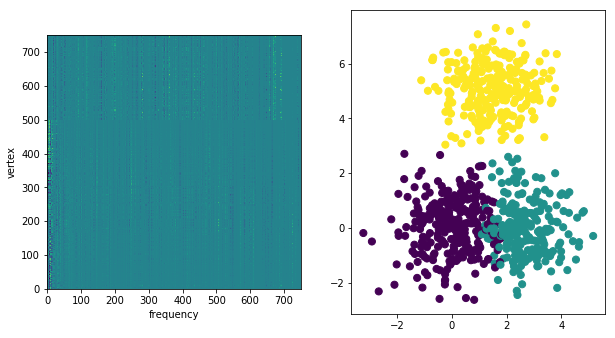

In [6]:
labels = KMeans(n_clusters=3).fit_predict(Cbase.T)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(Cbase.T, origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Let's look at the matrix with the saturation function applied. This is what the clustering is done on.
### Saturation = 0.1

NameError: name 'C' is not defined

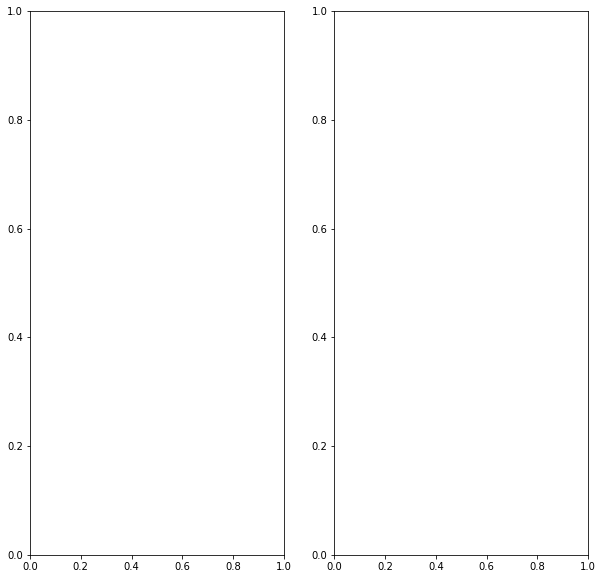

In [7]:
sat = 0.1
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Saturation = 0.5

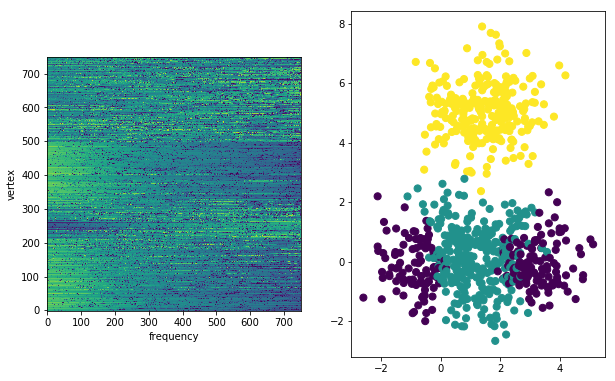

In [46]:
sat = 0.5
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Saturation = 0.9 (you can go much higher)

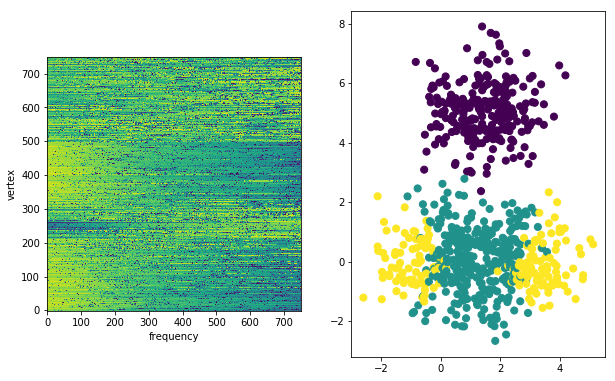

In [45]:
sat = 0.9
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Now let's look at the effect of t on our clustering and the underlying histogram

### t =1 

In [8]:
sat = 0.1
t = 1
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 


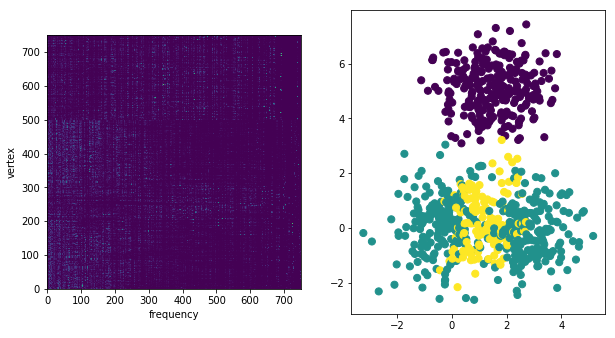

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 10

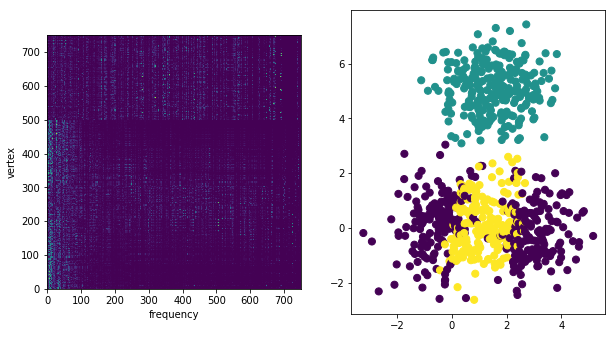

In [11]:
sat = 0.1
t = 10
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 20

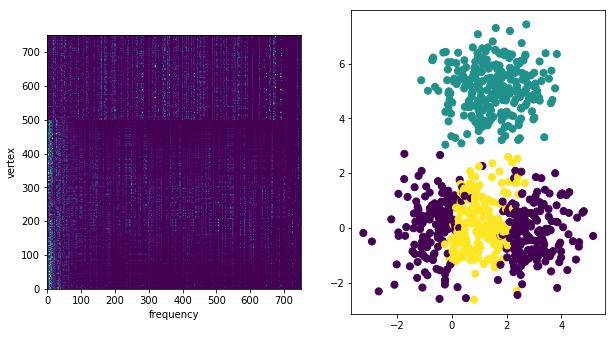

In [12]:
sat = 0.1
t = 20
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 40

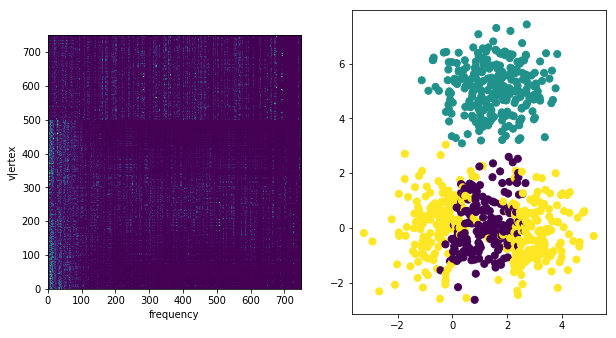

In [13]:
sat = 0.1
t = 10
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('v|ertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t=80

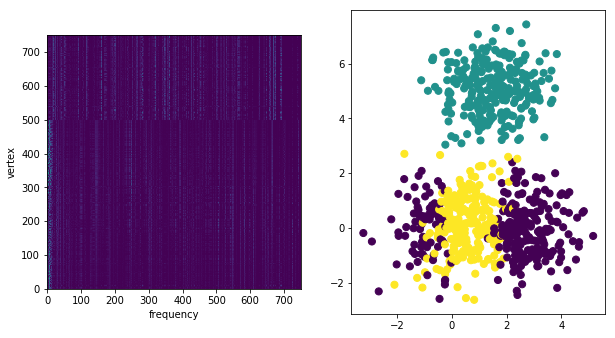

In [14]:
sat = 0.1
t = 80
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

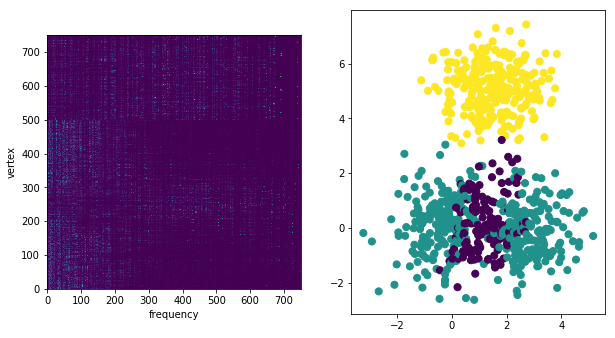